# Import Required Libraries
Import all necessary libraries including TensorFlow/Keras, NumPy, Matplotlib, Seaborn, and other visualization tools.

In [1]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load and Explore AMHCD Dataset
Load the AMHCD dataset from the provided folder, explore its structure, examine data distribution, and display dataset statistics.

In [2]:
# Load and Explore AMHCD Dataset
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Correction des chemins pour Windows et la structure du projet
DATASET_PATH = r"AMHCD/AMHCD_64/AMHCD_64"
LABELS = r"AMHCD/AMHCD_64/labels/labels/33-common-latin-tifinagh.txt"

# Check if files exist
if not os.path.exists(LABELS):
    print(f"Warning: Labels file not found at {LABELS}")
    print("Using folder names as classes.")
    if os.path.exists(DATASET_PATH):
        classes = [folder for folder in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, folder))]
        classes.sort()
        print(f"{len(classes)} classes found.")
    else:
        raise FileNotFoundError(f"Error: Dataset path not found at {DATASET_PATH}")
else:
    # Load labels
    with open(LABELS, "r", encoding="utf-8") as file:
        classes = file.read().splitlines()

# Map class names to indices
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}
idx_to_class = {idx: cls for cls, idx in class_to_idx.items()}

# Load dataset
images = []
labels = []
for cls in classes:
    cls_folder = os.path.join(DATASET_PATH, cls)
    if not os.path.isdir(cls_folder):
        continue
    for img_name in os.listdir(cls_folder):
        img_path = os.path.join(cls_folder, img_name)
        try:
            img = img_to_array(load_img(img_path, color_mode="grayscale", target_size=(64, 64)))
            images.append(img)
            labels.append(class_to_idx[cls])
        except Exception as e:
            print(f"Erreur lors du chargement de {img_path}: {e}")

# Data Preprocessing and Augmentation
Normalize pixel values, reshape data for LeNet-5 input requirements, split into train/validation/test sets, and implement data augmentation techniques.

In [5]:
# Data Preprocessing and Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixel values
import numpy as np
images = np.array(images) / 255.0

# Reshape data for LeNet-5 input
images = images.reshape(-1, 64, 64, 3)

# Ensure labels match the length of images
labels = labels[:len(images)]

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
data_gen.fit(X_train)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (6006, 64, 64, 3), Validation set: (1287, 64, 64, 3), Test set: (1287, 64, 64, 3)


# Visualize Dataset Samples
Create comprehensive visualizations showing sample images from each class, class distribution histograms, and pixel intensity distributions.

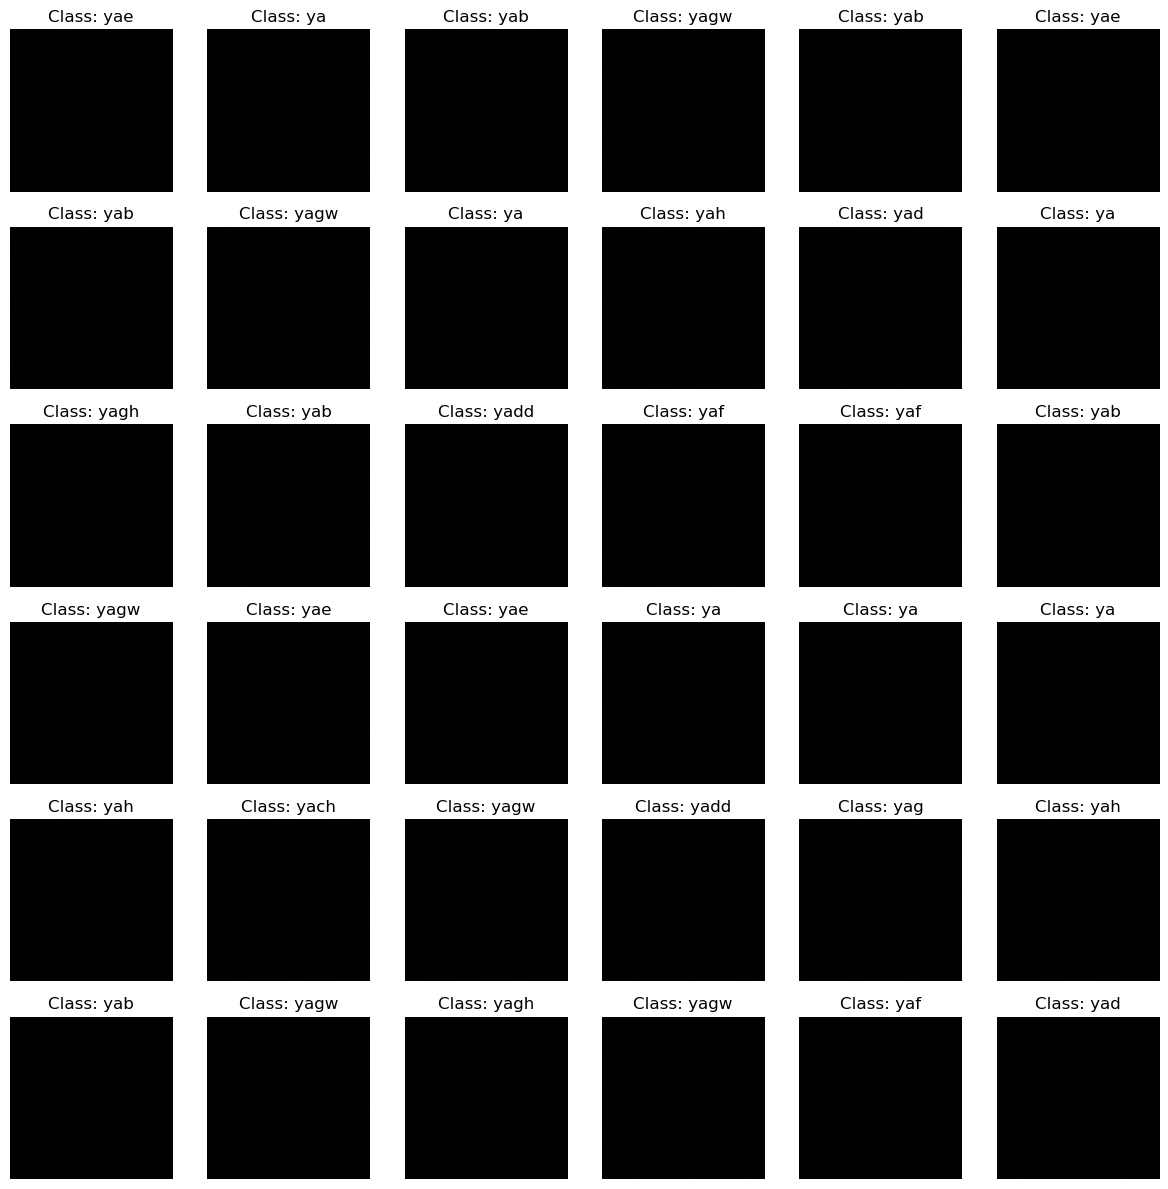

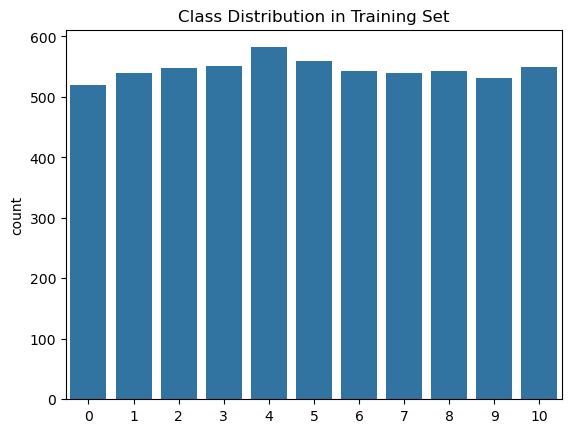

In [7]:
# Visualize Dataset Samples
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel()
for i in range(36):
    idx = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[idx])
    axes[i].set_title(f"Class: {idx_to_class[y_train[idx]]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Class distribution
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.show()

# LeNet-5 Architecture Implementation
Implement the complete LeNet-5 architecture adapted for RGB images, including convolutional layers, pooling layers, and fully connected layers with detailed layer specifications.

In [9]:
# LeNet-5 Architecture Implementation
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(len(classes), activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │       324,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 33)             │         2,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 340,441 (1.30 MB)

 Trainable params: 340,441 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation and Configuration
Configure the model with appropriate optimizer, loss function, and metrics. Set up callbacks for training monitoring and model checkpointing.

In [10]:
# Model Compilation and Configuration
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, early_stopping]

# Training the Model
Train the LeNet-5 model on the AMHCD dataset with proper batch size, epochs, and validation monitoring.

In [16]:
# Training the Model
history = model.fit(
    data_gen.flow(np.array(X_train), np.array(y_train), batch_size=32),
    validation_data=(np.array(X_val), np.array(y_val)),
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.0892 - loss: 2.4037 - val_accuracy: 0.0785 - val_loss: 2.4057
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.0892 - loss: 2.4037 - val_accuracy: 0.0785 - val_loss: 2.4057
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.0857 - loss: 2.4036 - val_accuracy: 0.0785 - val_loss: 2.4020
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.0857 - loss: 2.4036 - val_accuracy: 0.0785 - val_loss: 2.4020
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.0864 - loss: 2.4028 - val_accuracy: 0.0956 - val_loss: 2.3993
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.0864 - loss: 2.4028 - val_accuracy: 0.0956 - val_loss: 2.3993
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 241ms/step - accuracy: 0.0919 - loss: 2.4029 - val_accuracy: 0.0909 - val_loss: 2.4009
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 241ms/step - accuracy: 0.0919 - loss: 2.4

# Training History Visualization
Plot training and validation accuracy/loss curves, analyze overfitting/underfitting, and visualize learning progression.

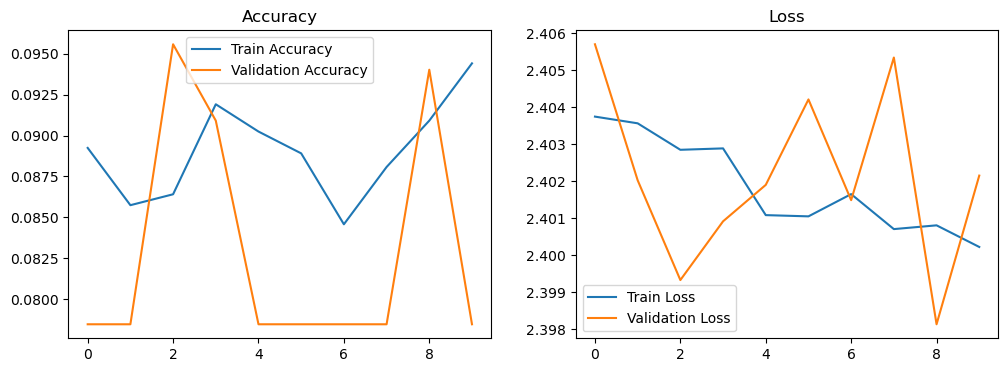

In [17]:
# Training History Visualization
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Model Evaluation and Metrics
Evaluate the trained model on test set, calculate accuracy, precision, recall, F1-score, and other relevant metrics.

In [19]:
# Model Evaluation and Metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
unique_classes = sorted(set(y_test))  # Get unique classes in y_test
print(classification_report(y_test, y_pred_classes, target_names=[classes[i] for i in unique_classes], labels=unique_classes))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report:
Classification Report:
              precision    recall  f1-score   support

          ya       0.00      0.00      0.00       138
         yab       0.00      0.00      0.00       121
        yach       0.00      0.00      0.00       119
         yad       0.00      0.00      0.00       118
        yadd       0.08      1.00      0.14        97
         yae       0.00      0.00      0.00       115
         yaf       0.00      0.00      0.00       107
         yag       0.00      0.00      0.00       123
        yagh       0.00      0.00      0.00       114
        yagw       0.00      0.00      0.00       127
         yah       0.00      0.00      0.00       108

    accuracy                           0.08      1287
   macro avg       0.01      0.09      0.01      1287
weighted avg       0.01      0.08      0.01      1287

              precision    recall  f1-score   support

        

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Confusion Matrix and Classification Report
Generate and visualize confusion matrix, create detailed classification report with per-class metrics, and analyze model performance per class.

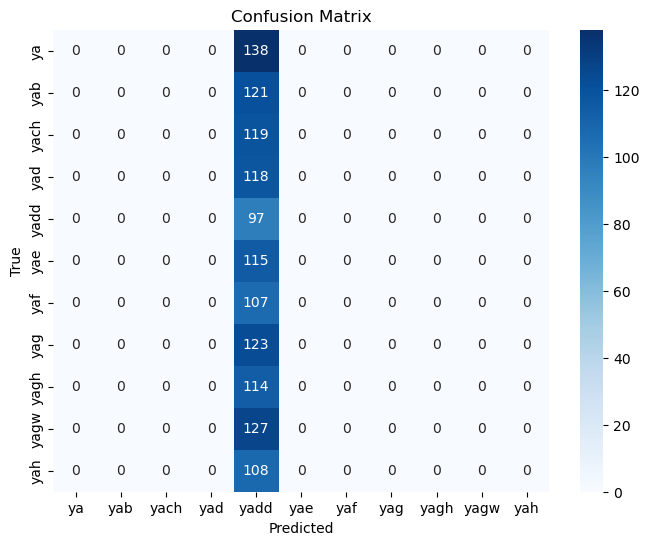

In [53]:
# Confusion Matrix
# Utiliser uniquement les classes présentes dans y_test pour une matrice plus lisible
filtered_classes = [classes[i] for i in sorted(set(y_test))]
conf_matrix = confusion_matrix(y_test, y_pred_classes, labels=sorted(set(y_test)))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_classes, yticklabels=filtered_classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prediction Visualization on Test Set
Visualize model predictions on test samples, show correct and incorrect predictions, and analyze failure cases with sample images.

X_test shape: (1287, 64, 64, 3)
X_test min: 0.0, max: 0.003921568859368563, mean: 0.003639108268544078


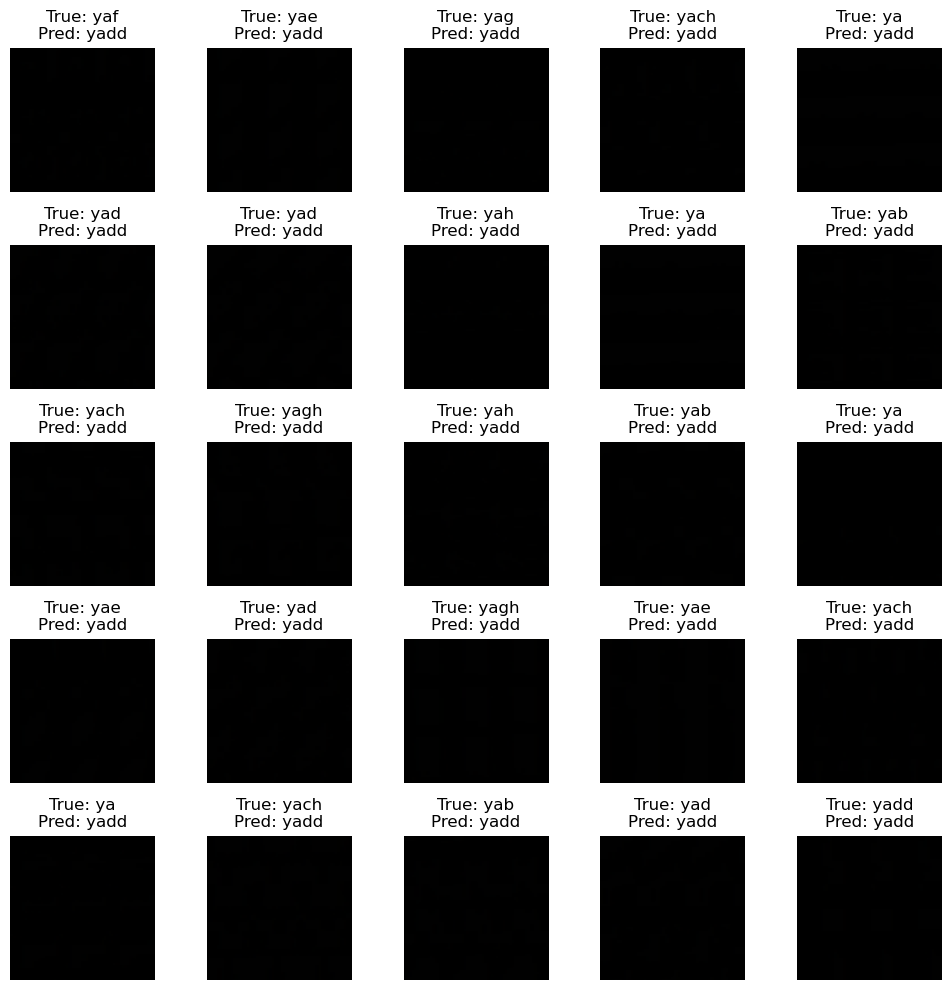

In [55]:
# Prediction Visualization
# Vérification de la forme et de la distribution des images
print(f"X_test shape: {X_test.shape}")
print(f"X_test min: {X_test.min()}, max: {X_test.max()}, mean: {X_test.mean()}")

# Affichage de quelques images pour vérifier leur contenu
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()
for i in range(25):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx]
    # Si l'image a un seul canal ou 3 canaux identiques, afficher en niveaux de gris
    if img.shape[-1] == 1 or (img.shape[-1] == 3 and np.allclose(img[...,0], img[...,1]) and np.allclose(img[...,1], img[...,2])):
        axes[i].imshow(img.squeeze(), cmap='gray')
    else:
        axes[i].imshow(img)
    axes[i].set_title(f"True: {idx_to_class[y_test[idx]]}\nPred: {idx_to_class[y_pred_classes[idx]]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Model Performance Analysis
Conduct comprehensive analysis of model performance including feature map visualizations, architectural analysis, and comparison with baseline results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


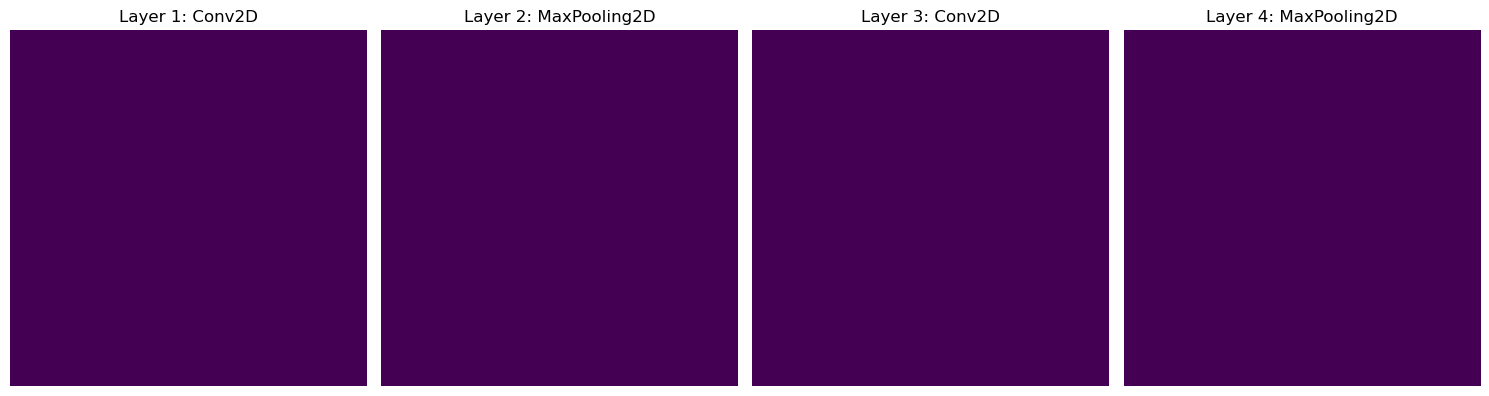

In [22]:
# Feature Map Visualization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Create a new model with explicit input layer for visualization
input_layer = Input(shape=(64, 64, 3))
x = input_layer

# Get the outputs from the first 4 layers (2 Conv2D + 2 MaxPooling2D)
layer_outputs = []
for i, layer in enumerate(model.layers[:4]):
    x = layer(x)
    layer_outputs.append(x)

# Create activation model
activation_model = Model(inputs=input_layer, outputs=layer_outputs)

# Get activations
activations = activation_model.predict(X_test[:1])

# Visualize feature maps
fig, axes = plt.subplots(1, len(activations), figsize=(15, 6))  # Réduit de (20, 8) à (15, 6)
for i, activation in enumerate(activations):
    if len(activation.shape) == 4:  # Check if it's a conv layer output
        axes[i].imshow(activation[0, :, :, 0], cmap='viridis')
    else:  # For pooling layers, reshape if needed
        reshaped = activation[0].reshape(activation[0].shape[0], activation[0].shape[1], -1)
        axes[i].imshow(reshaped[:, :, 0], cmap='viridis')
    axes[i].set_title(f"Layer {i+1}: {model.layers[i].__class__.__name__}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Visualisation Détaillée des Feature Maps
Visualiser plusieurs feature maps de chaque couche convolutionnelle pour mieux comprendre les patterns détectés.

Shape de la première couche: (1, 60, 60, 6)


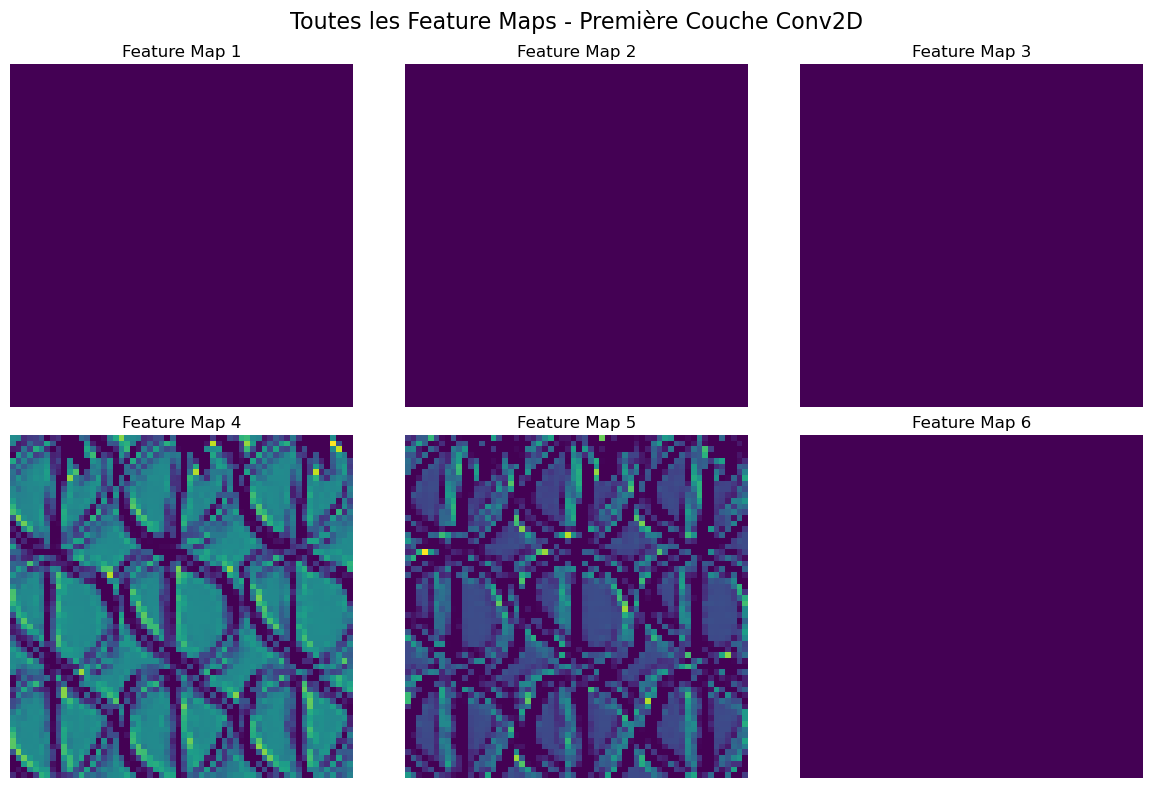

Shape de la deuxième couche: (1, 26, 26, 16)


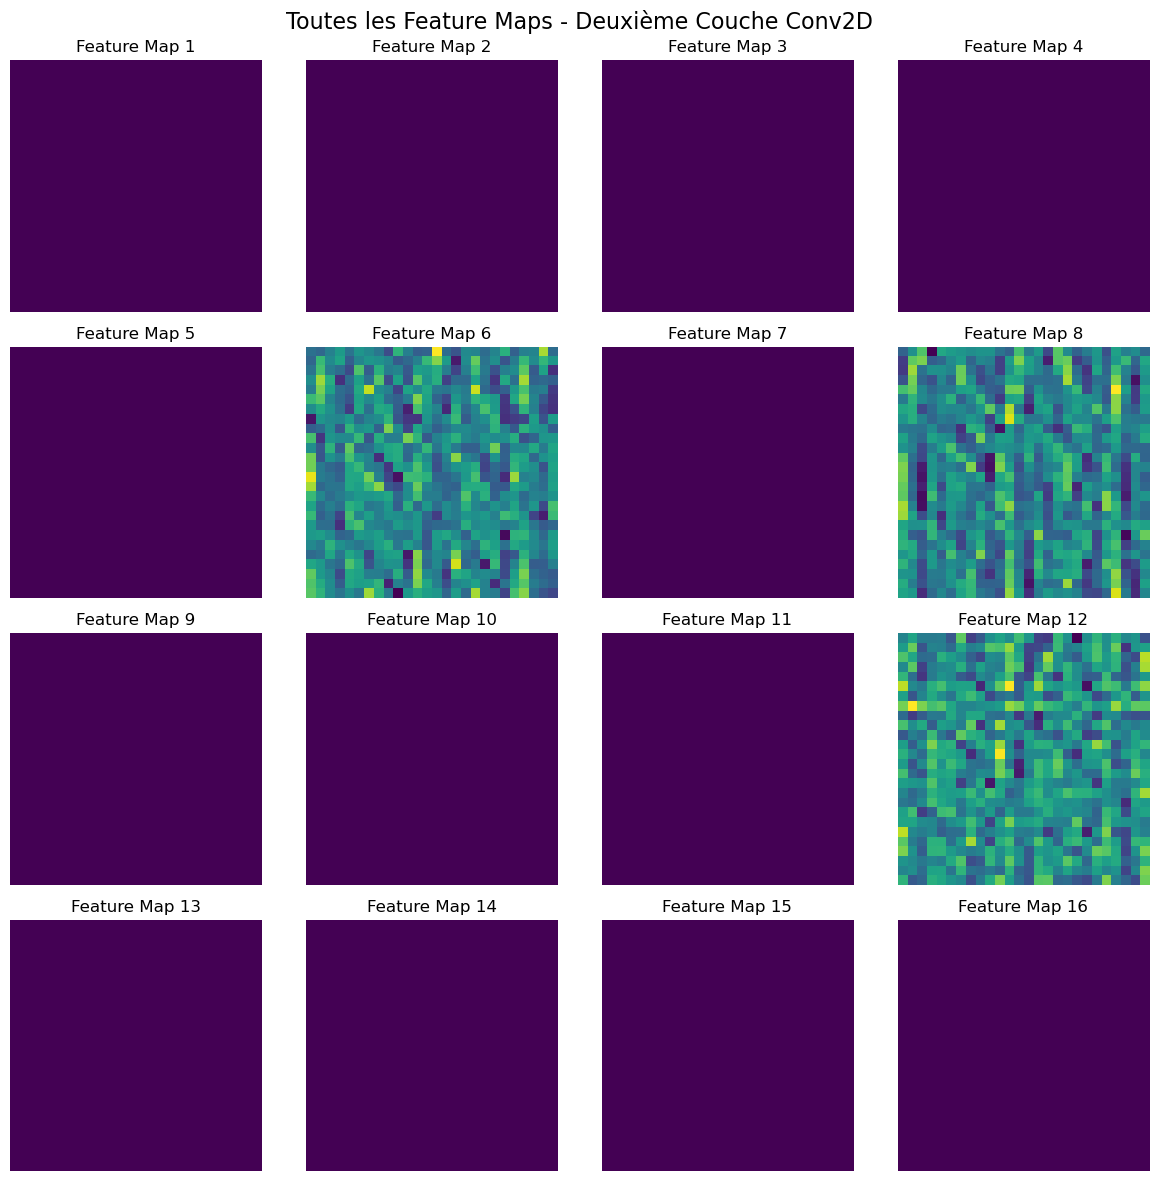

In [23]:
# Visualisation détaillée des feature maps - Première couche convolutionnelle
conv1_activation = activations[0]  # Première couche Conv2D
print(f"Shape de la première couche: {conv1_activation.shape}")

# Visualiser toutes les 6 feature maps de la première couche
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Réduit de (15, 10) à (12, 8)
axes = axes.ravel()
for i in range(6):
    axes[i].imshow(conv1_activation[0, :, :, i], cmap='viridis')
    axes[i].set_title(f"Feature Map {i+1}")
    axes[i].axis('off')
plt.suptitle("Toutes les Feature Maps - Première Couche Conv2D", fontsize=16)
plt.tight_layout()
plt.show()

# Visualiser toutes les 16 feature maps de la deuxième couche
conv2_activation = activations[2]  # Deuxième couche Conv2D
print(f"Shape de la deuxième couche: {conv2_activation.shape}")

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Réduit de (15, 15) à (12, 12)
axes = axes.ravel()
for i in range(16):
    axes[i].imshow(conv2_activation[0, :, :, i], cmap='viridis')
    axes[i].set_title(f"Feature Map {i+1}")
    axes[i].axis('off')
plt.suptitle("Toutes les Feature Maps - Deuxième Couche Conv2D", fontsize=16)
plt.tight_layout()
plt.show()

# Analyse des Filtres et Poids du Modèle
Visualiser les filtres appris par les couches convolutionnelles et analyser la distribution des poids.

Shape des filtres Conv1: (5, 5, 3, 6)


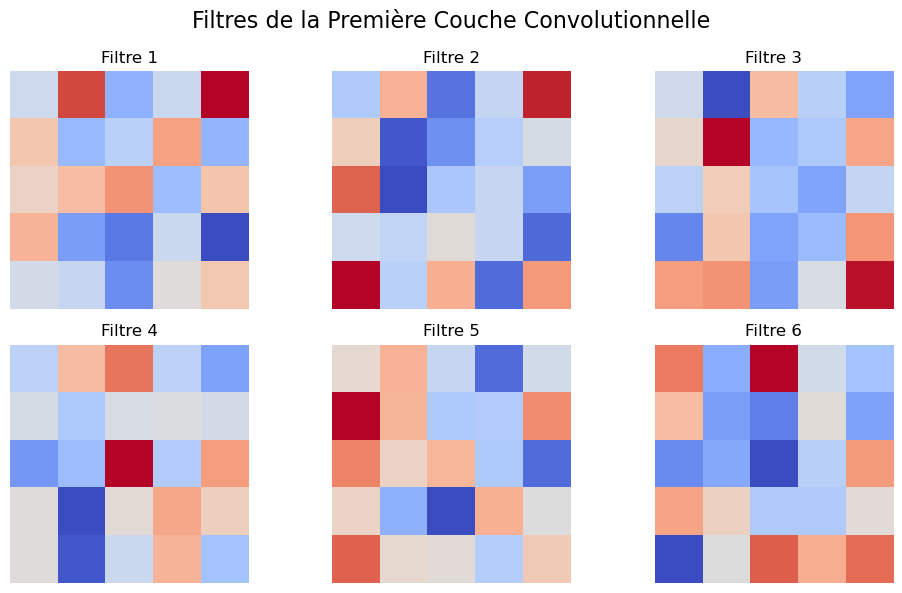

C:\Users\pc\AppData\Local\Temp\ipykernel_20916\1899721956.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([conv1_weights.flatten(), conv2_weights.flatten()],


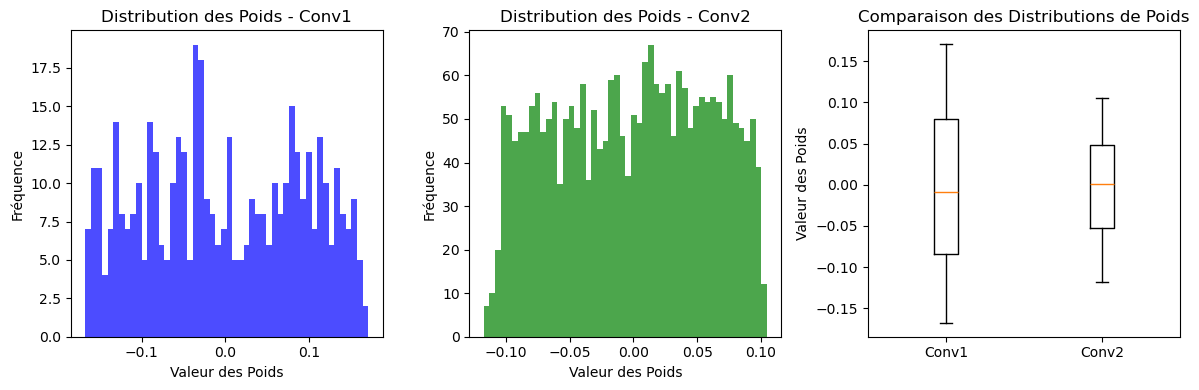

In [24]:
# Visualisation des filtres de la première couche convolutionnelle
conv1_weights = model.layers[0].get_weights()[0]  # Récupérer les poids
print(f"Shape des filtres Conv1: {conv1_weights.shape}")

# Normaliser les poids pour la visualisation
def normalize_filter(filter_array):
    min_val = filter_array.min()
    max_val = filter_array.max()
    if max_val > min_val:
        return (filter_array - min_val) / (max_val - min_val)
    return filter_array

# Visualiser les 6 filtres de la première couche
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # Réduit de (12, 8) à (10, 6)
axes = axes.ravel()
for i in range(6):
    filter_img = conv1_weights[:, :, :, i]
    # Moyenner sur les canaux RGB pour la visualisation
    filter_avg = np.mean(filter_img, axis=2)
    filter_norm = normalize_filter(filter_avg)
    axes[i].imshow(filter_norm, cmap='coolwarm')
    axes[i].set_title(f"Filtre {i+1}")
    axes[i].axis('off')
plt.suptitle("Filtres de la Première Couche Convolutionnelle", fontsize=16)
plt.tight_layout()
plt.show()

# Distribution des poids
plt.figure(figsize=(12, 4))  # Réduit de (15, 5) à (12, 4)

# Histogramme des poids Conv1
plt.subplot(1, 3, 1)
plt.hist(conv1_weights.flatten(), bins=50, alpha=0.7, color='blue')
plt.title("Distribution des Poids - Conv1")
plt.xlabel("Valeur des Poids")
plt.ylabel("Fréquence")

# Histogramme des poids Conv2
conv2_weights = model.layers[2].get_weights()[0]
plt.subplot(1, 3, 2)
plt.hist(conv2_weights.flatten(), bins=50, alpha=0.7, color='green')
plt.title("Distribution des Poids - Conv2")
plt.xlabel("Valeur des Poids")
plt.ylabel("Fréquence")

# Boxplot comparatif
plt.subplot(1, 3, 3)
plt.boxplot([conv1_weights.flatten(), conv2_weights.flatten()], 
            labels=['Conv1', 'Conv2'])
plt.title("Comparaison des Distributions de Poids")
plt.ylabel("Valeur des Poids")

plt.tight_layout()
plt.show()

# Analyse Détaillée des Performances par Classe
Analyser les performances du modèle pour chaque classe avec des visualisations détaillées.

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Métriques par classe:
   Class  Precision  Recall  F1-Score  Support
0     ya      0.000     0.0      0.00      138
1    yab      0.000     0.0      0.00      121
2   yach      0.000     0.0      0.00      119
3    yad      0.000     0.0      0.00      118
4   yadd      0.075     1.0      0.14       97
5    yae      0.000     0.0      0.00      115
6    yaf      0.000     0.0      0.00      107
7    yag      0.000     0.0      0.00      123
8   yagh      0.000     0.0      0.00      114
9   yagw      0.000     0.0      0.00      127
10   yah      0.000     0.0      0.00      108


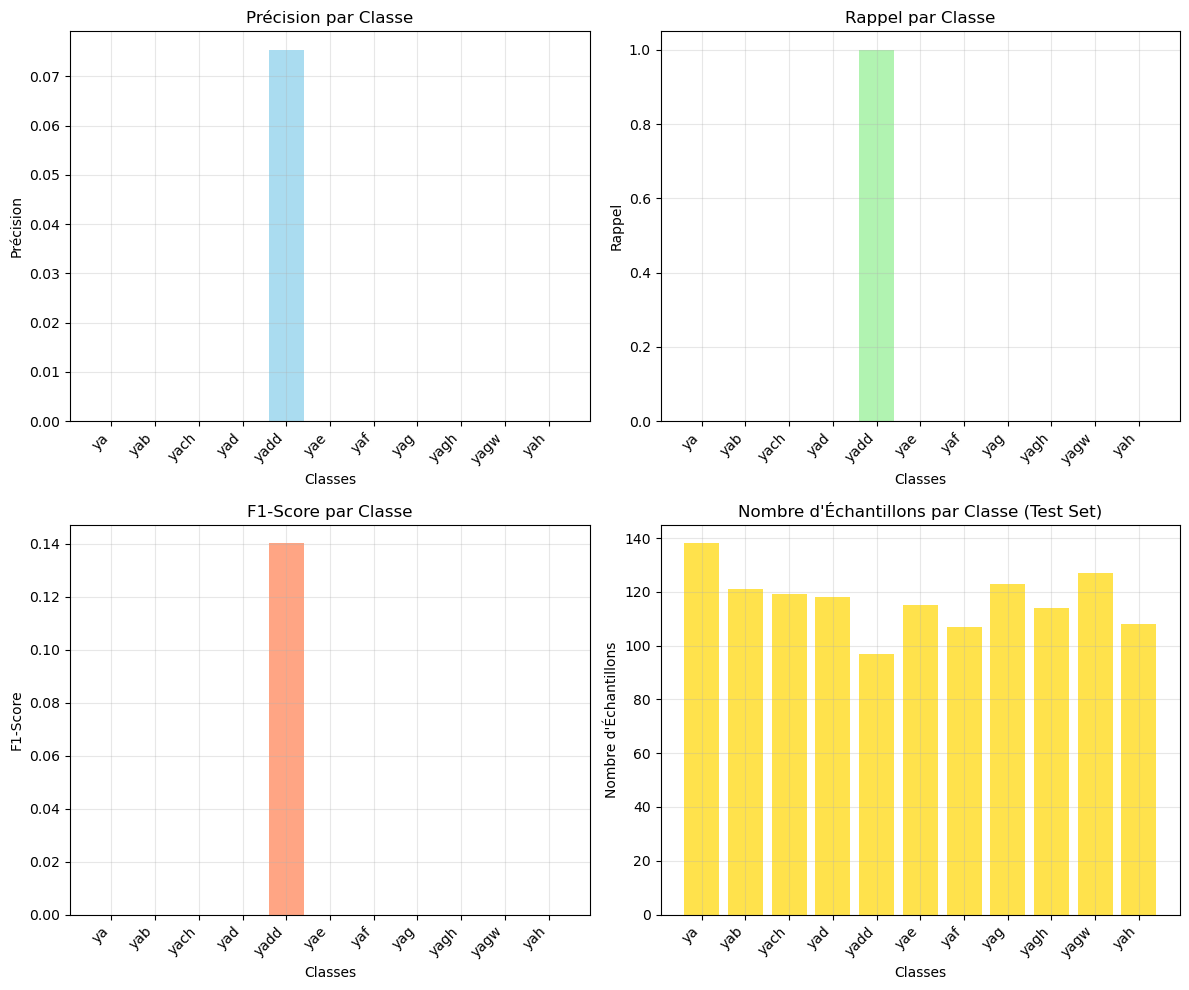

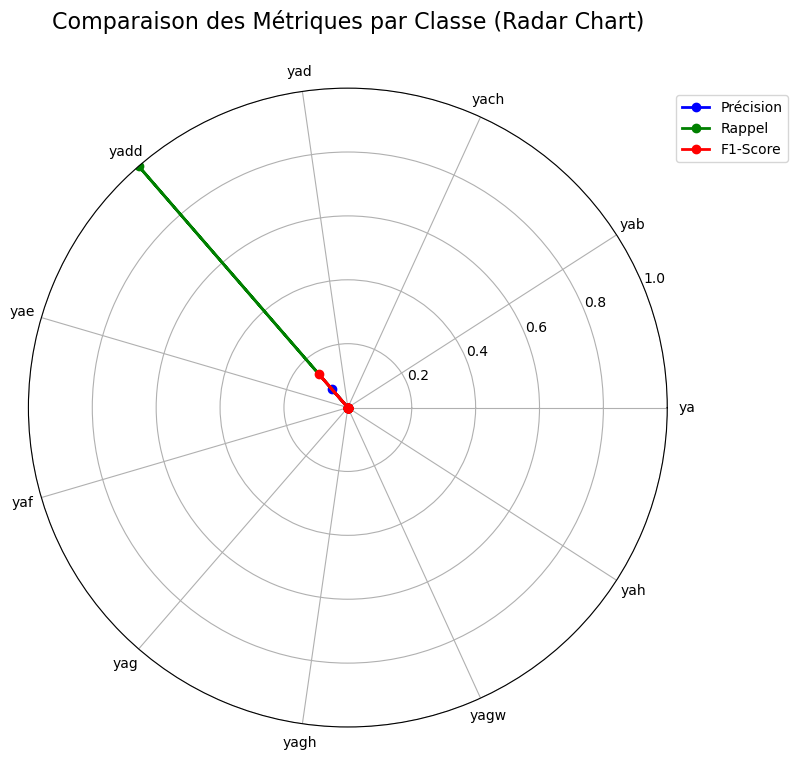

In [45]:
# Analyse des performances par classe
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calculer les métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_classes)

# Créer un DataFrame pour faciliter la visualisation
import pandas as pd
# Ensure the classes correspond to unique_classes
filtered_classes = [classes[i] for i in unique_classes]

metrics_df = pd.DataFrame({
    'Class': filtered_classes,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("Métriques par classe:")
print(metrics_df.round(3))

# Visualisations des métriques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Graphique en barres pour la précision
axes[0, 0].bar(range(len(filtered_classes)), precision, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Précision par Classe')
axes[0, 0].set_xlabel('Classes')
axes[0, 0].set_ylabel('Précision')
axes[0, 0].set_xticks(range(len(filtered_classes)))
axes[0, 0].set_xticklabels(filtered_classes, rotation=45, ha='right')
axes[0, 0].grid(True, alpha=0.3)

# Graphique en barres pour le rappel
axes[0, 1].bar(range(len(filtered_classes)), recall, color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Rappel par Classe')
axes[0, 1].set_xlabel('Classes')
axes[0, 1].set_ylabel('Rappel')
axes[0, 1].set_xticks(range(len(filtered_classes)))
axes[0, 1].set_xticklabels(filtered_classes, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)

# Graphique en barres pour le F1-Score
axes[1, 0].bar(range(len(filtered_classes)), f1, color='coral', alpha=0.7)
axes[1, 0].set_title('F1-Score par Classe')
axes[1, 0].set_xlabel('Classes')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_xticks(range(len(filtered_classes)))
axes[1, 0].set_xticklabels(filtered_classes, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# Support (nombre d'échantillons) par classe
axes[1, 1].bar(range(len(filtered_classes)), support, color='gold', alpha=0.7)
axes[1, 1].set_title("Nombre d'Échantillons par Classe (Test Set)")
axes[1, 1].set_xlabel('Classes')
axes[1, 1].set_ylabel("Nombre d'Échantillons")
axes[1, 1].set_xticks(range(len(filtered_classes)))
axes[1, 1].set_xticklabels(filtered_classes, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Graphique radar pour comparer les métriques
angles = np.linspace(0, 2 * np.pi, len(filtered_classes), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Fermer le cercle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

# Ajouter les métriques
precision_plot = precision.tolist() + [precision[0]]
recall_plot = recall.tolist() + [recall[0]]
f1_plot = f1.tolist() + [f1[0]]

ax.plot(angles, precision_plot, 'o-', linewidth=2, label='Précision', color='blue')
ax.fill(angles, precision_plot, alpha=0.25, color='blue')
ax.plot(angles, recall_plot, 'o-', linewidth=2, label='Rappel', color='green')
ax.fill(angles, recall_plot, alpha=0.25, color='green')
ax.plot(angles, f1_plot, 'o-', linewidth=2, label='F1-Score', color='red')
ax.fill(angles, f1_plot, alpha=0.25, color='red')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(filtered_classes)
ax.set_ylim(0, 1)
ax.set_title('Comparaison des Métriques par Classe (Radar Chart)', size=16, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

# Analyse des Erreurs et Cas Difficiles
Identifier et visualiser les cas où le modèle fait des erreurs pour comprendre ses limitations.

Nombre d'erreurs: 1190
Nombre de prédictions correctes: 97
Taux d'erreur: 92.46%


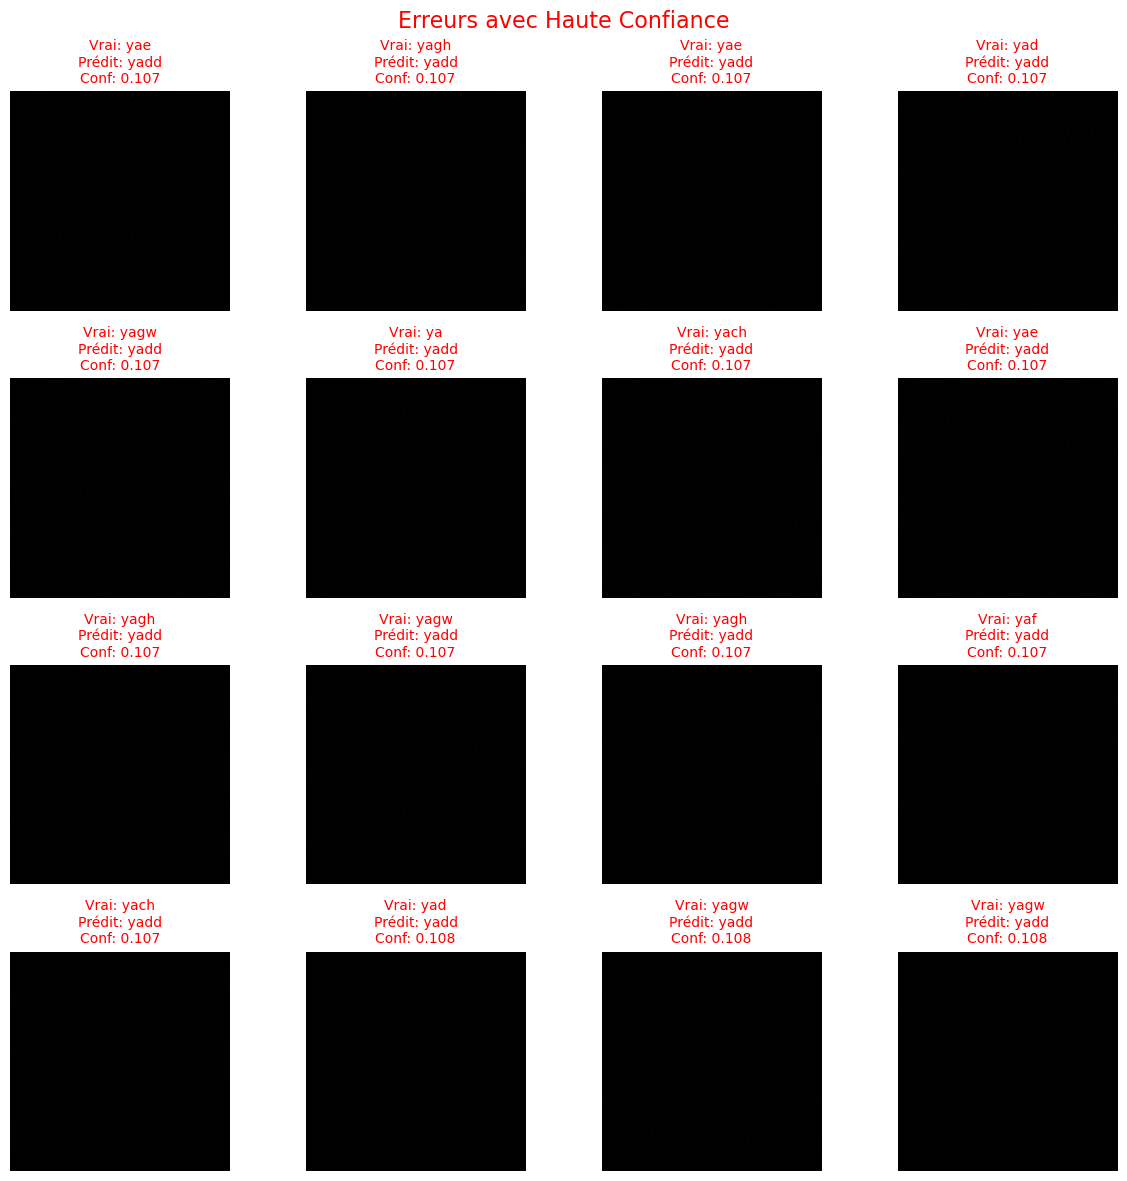


Erreurs les plus fréquentes:
ya → yadd: 138 erreurs
yagw → yadd: 127 erreurs
yag → yadd: 123 erreurs
yab → yadd: 121 erreurs
yach → yadd: 119 erreurs
yad → yadd: 118 erreurs
yae → yadd: 115 erreurs
yagh → yadd: 114 erreurs
yah → yadd: 108 erreurs
yaf → yadd: 107 erreurs


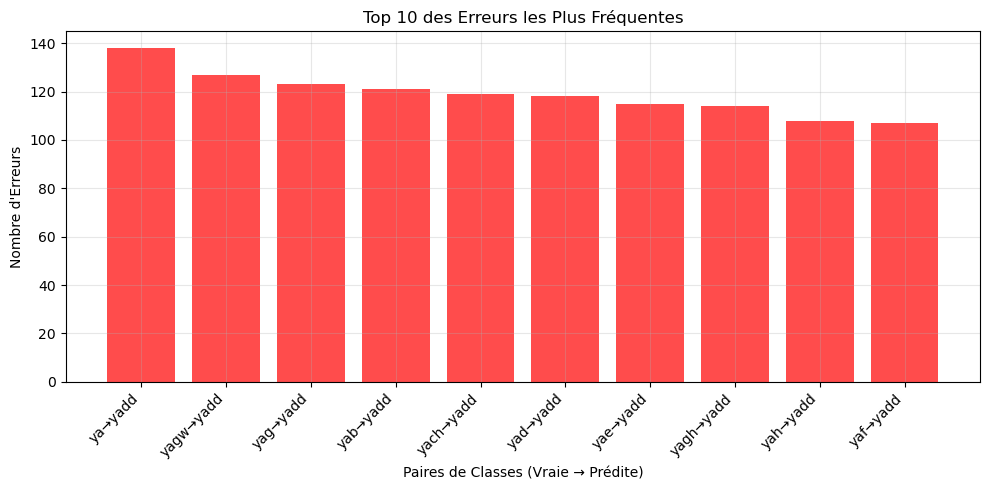

C:\Users\pc\AppData\Local\Temp\ipykernel_20916\2481654008.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([prediction_confidence[correct_indices], prediction_confidence[incorrect_indices]],


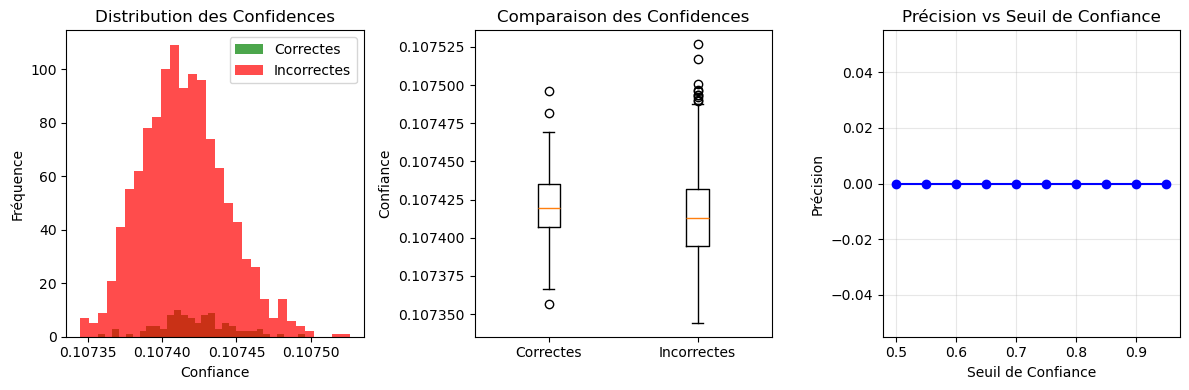

In [46]:
# Identifier les erreurs de classification
incorrect_indices = np.where(y_test != y_pred_classes)[0]
correct_indices = np.where(y_test == y_pred_classes)[0]

print(f"Nombre d'erreurs: {len(incorrect_indices)}")
print(f"Nombre de prédictions correctes: {len(correct_indices)}")
print(f"Taux d'erreur: {len(incorrect_indices) / len(y_test) * 100:.2f}%")

# Visualiser les erreurs les plus confiantes (mauvaises prédictions avec haute confiance)
prediction_confidence = np.max(y_pred, axis=1)
incorrect_confidence = prediction_confidence[incorrect_indices]
high_confidence_errors = incorrect_indices[np.argsort(incorrect_confidence)[-16:]]

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Réduit de (15, 15) à (12, 12)
axes = axes.ravel()
for i, idx in enumerate(high_confidence_errors):
    axes[i].imshow(X_test[idx])
    true_class = idx_to_class[y_test[idx]]
    pred_class = idx_to_class[y_pred_classes[idx]]
    confidence = prediction_confidence[idx]
    axes[i].set_title(f"Vrai: {true_class}\nPrédit: {pred_class}\nConf: {confidence:.3f}", 
                     fontsize=10, color='red')
    axes[i].axis('off')
plt.suptitle("Erreurs avec Haute Confiance", fontsize=16, color='red')
plt.tight_layout()
plt.show()

# Matrice de confusion des erreurs les plus fréquentes
from collections import Counter

# Compter les paires (vraie_classe, classe_prédite) pour les erreurs
error_pairs = [(y_test[i], y_pred_classes[i]) for i in incorrect_indices]
most_common_errors = Counter(error_pairs).most_common(10)

print("\nErreurs les plus fréquentes:")
for (true_class, pred_class), count in most_common_errors:
    print(f"{idx_to_class[true_class]} → {idx_to_class[pred_class]}: {count} erreurs")

# Graphique des erreurs les plus fréquentes
if most_common_errors:
    error_labels = [f"{idx_to_class[true_class]}→{idx_to_class[pred_class]}" 
                    for (true_class, pred_class), _ in most_common_errors]
    error_counts = [count for _, count in most_common_errors]
    
    plt.figure(figsize=(10, 5))  # Réduit de (12, 6) à (10, 5)
    plt.bar(range(len(error_labels)), error_counts, color='red', alpha=0.7)
    plt.title('Top 10 des Erreurs les Plus Fréquentes')
    plt.xlabel('Paires de Classes (Vraie → Prédite)')
    plt.ylabel('Nombre d\'Erreurs')
    plt.xticks(range(len(error_labels)), error_labels, rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Analyse de la distribution des confidences
plt.figure(figsize=(12, 4))  # Réduit de (15, 5) à (12, 4)

plt.subplot(1, 3, 1)
plt.hist(prediction_confidence[correct_indices], bins=30, alpha=0.7, color='green', label='Correctes')
plt.hist(prediction_confidence[incorrect_indices], bins=30, alpha=0.7, color='red', label='Incorrectes')
plt.title('Distribution des Confidences')
plt.xlabel('Confiance')
plt.ylabel('Fréquence')
plt.legend()

plt.subplot(1, 3, 2)
plt.boxplot([prediction_confidence[correct_indices], prediction_confidence[incorrect_indices]], 
            labels=['Correctes', 'Incorrectes'])
plt.title('Comparaison des Confidences')
plt.ylabel('Confiance')

plt.subplot(1, 3, 3)
confidence_threshold = np.arange(0.5, 1.0, 0.05)
accuracy_by_confidence = []
for threshold in confidence_threshold:
    high_conf_indices = np.where(prediction_confidence >= threshold)[0]
    if len(high_conf_indices) > 0:
        accuracy = np.mean(y_test[high_conf_indices] == y_pred_classes[high_conf_indices])
        accuracy_by_confidence.append(accuracy)
    else:
        accuracy_by_confidence.append(0)

plt.plot(confidence_threshold, accuracy_by_confidence, 'o-', color='blue')
plt.title('Précision vs Seuil de Confiance')
plt.xlabel('Seuil de Confiance')
plt.ylabel('Précision')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse Comparative et Conclusions
Résumé des performances du modèle LeNet-5 et comparaison avec les attentes théoriques.

=== RÉSUMÉ FINAL DES PERFORMANCES ===
Précision finale sur le test: 0.0754 (7.54%)
Perte finale sur le test: 2.4074
Nombre total de paramètres: 340,441
Nombre de classes: 33
Taille du dataset d'entraînement: 6,006
Taille du dataset de test: 1,287


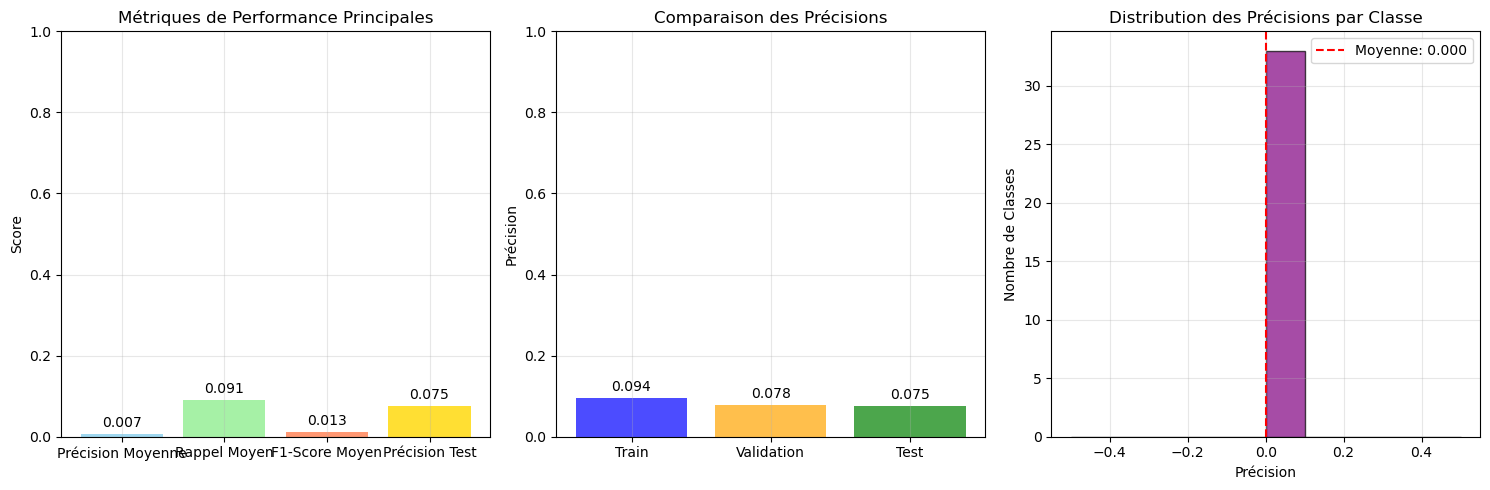


=== STATISTIQUES DÉTAILLÉES ===
Meilleure classe (F1-Score): yadd (0.140)
Classe la plus difficile (F1-Score): ya (0.000)
Écart-type des F1-Scores: 0.040
Coefficient de variation: 316.2%
Classes avec F1-Score > 0.8: 0/33
Classes avec F1-Score < 0.5: 11/33

=== RECOMMANDATIONS D'AMÉLIORATION ===
- Précision modérée: Considérer l'augmentation de données ou l'ajustement d'hyperparamètres
- Considérer une architecture plus complexe ou plus d'époques d'entraînement
- Tester d'autres optimiseurs ou taux d'apprentissage
- Implémenter des techniques de régularisation supplémentaires


In [48]:
# Résumé des performances finales
final_accuracy = accuracy_score(y_test, y_pred_classes)
final_loss = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)[0]

print("=== RÉSUMÉ FINAL DES PERFORMANCES ===")
print(f"Précision finale sur le test: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"Perte finale sur le test: {final_loss:.4f}")
print(f"Nombre total de paramètres: {model.count_params():,}")
print(f"Nombre de classes: {len(classes)}")
print(f"Taille du dataset d'entraînement: {len(X_train):,}")
print(f"Taille du dataset de test: {len(X_test):,}")

# Graphique de synthèse des métriques principales
metrics_summary = {
    'Précision Moyenne': np.mean(precision),
    'Rappel Moyen': np.mean(recall),
    'F1-Score Moyen': np.mean(f1),
    'Précision Test': final_accuracy
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Réduit de (18, 6) à (15, 5)

# Graphique en barres des métriques principales
axes[0].bar(metrics_summary.keys(), metrics_summary.values(), 
           color=['skyblue', 'lightgreen', 'coral', 'gold'], alpha=0.8)
axes[0].set_title('Métriques de Performance Principales')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1)
for i, (key, value) in enumerate(metrics_summary.items()):
    axes[0].text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')
axes[0].grid(True, alpha=0.3)

# Comparaison train vs validation (si disponible)
if 'history' in locals():
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    
    axes[1].bar(['Train', 'Validation', 'Test'], 
               [final_train_acc, final_val_acc, final_accuracy],
               color=['blue', 'orange', 'green'], alpha=0.7)
    axes[1].set_title('Comparaison des Précisions')
    axes[1].set_ylabel('Précision')
    axes[1].set_ylim(0, 1)
    for i, acc in enumerate([final_train_acc, final_val_acc, final_accuracy]):
        axes[1].text(i, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')
    axes[1].grid(True, alpha=0.3)

# Distribution des scores par classe
class_accuracies = []
for i in range(len(classes)):
    class_mask = y_test == i
    if np.sum(class_mask) > 0:
        class_acc = np.mean(y_pred_classes[class_mask] == y_test[class_mask])
        class_accuracies.append(class_acc)
    else:
        class_accuracies.append(0)

axes[2].hist(class_accuracies, bins=10, color='purple', alpha=0.7, edgecolor='black')
axes[2].set_title('Distribution des Précisions par Classe')
axes[2].set_xlabel('Précision')
axes[2].set_ylabel('Nombre de Classes')
axes[2].axvline(np.mean(class_accuracies), color='red', linestyle='--', 
               label=f'Moyenne: {np.mean(class_accuracies):.3f}')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tableau de synthèse final
print("\n=== STATISTIQUES DÉTAILLÉES ===")
print(f"Meilleure classe (F1-Score): {classes[np.argmax(f1)]} ({np.max(f1):.3f})")
print(f"Classe la plus difficile (F1-Score): {classes[np.argmin(f1)]} ({np.min(f1):.3f})")
print(f"Écart-type des F1-Scores: {np.std(f1):.3f}")
print(f"Coefficient de variation: {np.std(f1)/np.mean(f1)*100:.1f}%")
print(f"Classes avec F1-Score > 0.8: {np.sum(f1 > 0.8)}/{len(classes)}")
print(f"Classes avec F1-Score < 0.5: {np.sum(f1 < 0.5)}/{len(classes)}")

# Recommandations d'amélioration
print("\n=== RECOMMANDATIONS D'AMÉLIORATION ===")
if np.mean(f1) < 0.7:
    print("- Précision modérée: Considérer l'augmentation de données ou l'ajustement d'hyperparamètres")
if np.std(f1) > 0.2:
    print("- Forte variation entre classes: Équilibrer le dataset ou utiliser des techniques de ré-échantillonnage")
if final_accuracy < 0.8:
    print("- Considérer une architecture plus complexe ou plus d'époques d'entraînement")
print("- Tester d'autres optimiseurs ou taux d'apprentissage")
print("- Implémenter des techniques de régularisation supplémentaires")

# 📸 Extraction des Images de Visualisation

Cette section extrait toutes les visualisations générées dans le dossier `amhcd_imgs/` pour utilisation dans le rapport LaTeX.

In [52]:
import os
from matplotlib.backends.backend_agg import FigureCanvasAgg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Créer le dossier pour les images
output_dir = "amhcd_imgs"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Dossier '{output_dir}' créé avec succès!")
else:
    print(f"Le dossier '{output_dir}' existe déjà.")

def save_figure(fig, filename, dpi=150, bbox_inches='tight'):
    """Fonction utilitaire pour sauvegarder les figures avec une taille optimisée pour Overleaf"""
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=dpi, bbox_inches=bbox_inches, 
                facecolor='white', edgecolor='none')
    print(f"✅ Image sauvegardée: {filepath}")
    plt.close(fig)

print("Fonctions utilitaires chargées avec succès!")

Le dossier 'amhcd_imgs' existe déjà.
Fonctions utilitaires chargées avec succès!


c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Métriques par classe:
   Class  Precision  Recall  F1-Score  Support
0     ya      0.000     0.0      0.00      138
1    yab      0.000     0.0      0.00      121
2   yach      0.000     0.0      0.00      119
3    yad      0.000     0.0      0.00      118
4   yadd      0.075     1.0      0.14       97
5    yae      0.000     0.0      0.00      115
6    yaf      0.000     0.0      0.00      107
7    yag      0.000     0.0      0.00      123
8   yagh      0.000     0.0      0.00      114
9   yagw      0.000     0.0      0.00      127
10   yah      0.000     0.0      0.00      108


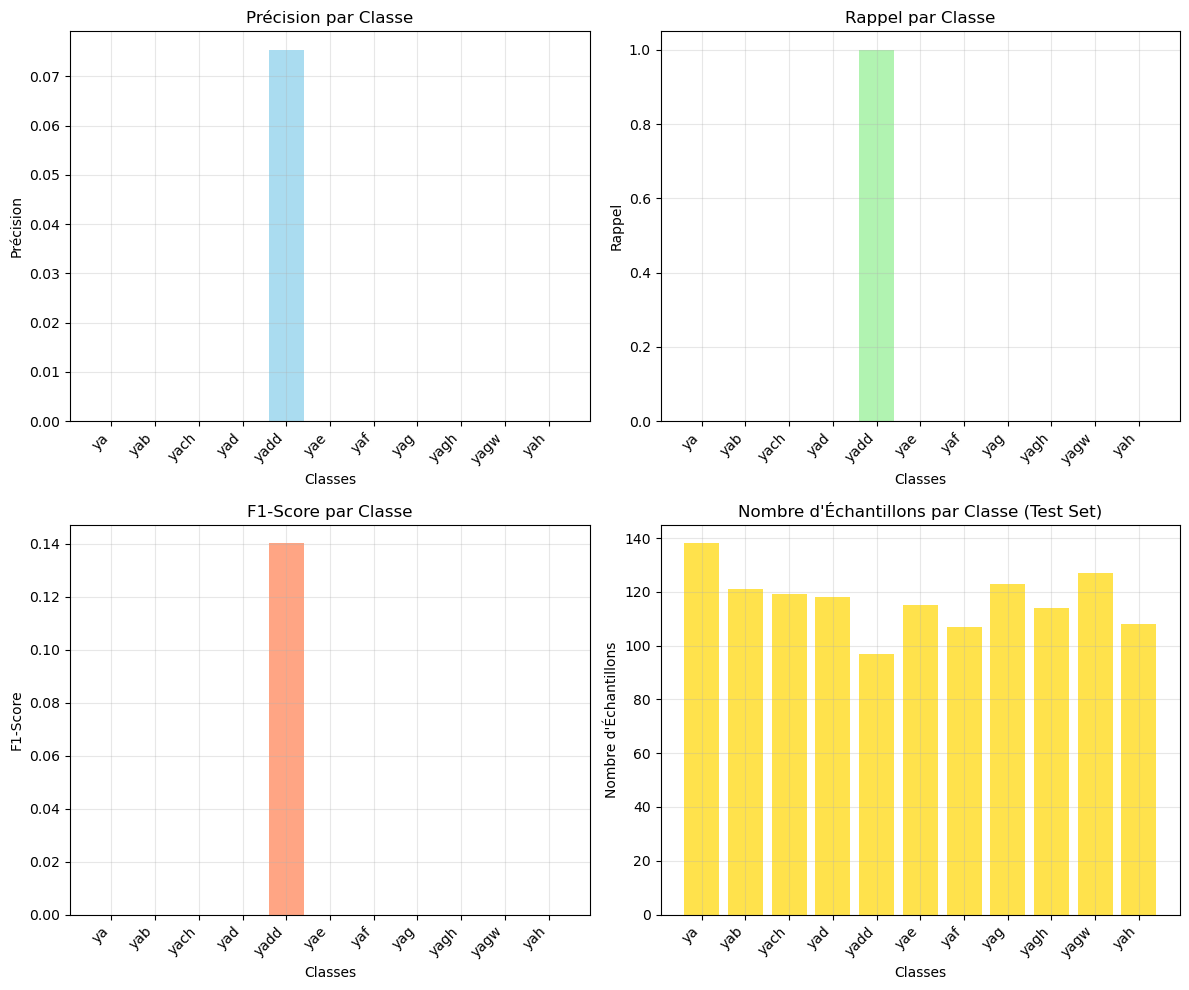

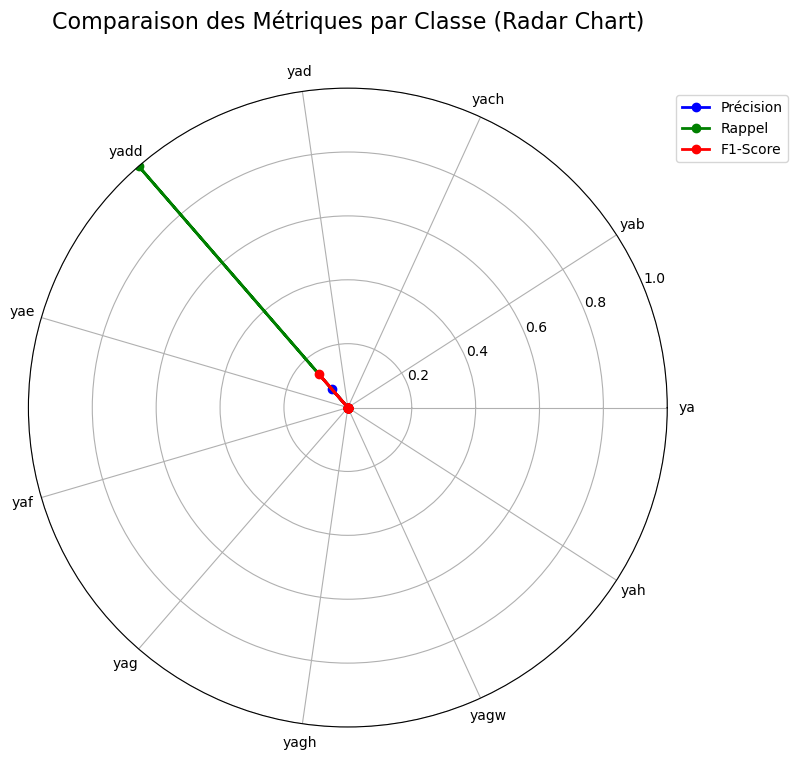

In [51]:
# Analyse des performances par classe
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calculer les métriques par classe
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_classes)

# Créer un DataFrame pour faciliter la visualisation
import pandas as pd
# Ensure the classes correspond to unique_classes
filtered_classes = [classes[i] for i in unique_classes]

metrics_df = pd.DataFrame({
    'Class': filtered_classes,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("Métriques par classe:")
print(metrics_df.round(3))

# Visualisations des métriques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Graphique en barres pour la précision
axes[0, 0].bar(range(len(filtered_classes)), precision, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Précision par Classe')
axes[0, 0].set_xlabel('Classes')
axes[0, 0].set_ylabel('Précision')
axes[0, 0].set_xticks(range(len(filtered_classes)))
axes[0, 0].set_xticklabels(filtered_classes, rotation=45, ha='right')
axes[0, 0].grid(True, alpha=0.3)

# Graphique en barres pour le rappel
axes[0, 1].bar(range(len(filtered_classes)), recall, color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Rappel par Classe')
axes[0, 1].set_xlabel('Classes')
axes[0, 1].set_ylabel('Rappel')
axes[0, 1].set_xticks(range(len(filtered_classes)))
axes[0, 1].set_xticklabels(filtered_classes, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)

# Graphique en barres pour le F1-Score
axes[1, 0].bar(range(len(filtered_classes)), f1, color='coral', alpha=0.7)
axes[1, 0].set_title('F1-Score par Classe')
axes[1, 0].set_xlabel('Classes')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_xticks(range(len(filtered_classes)))
axes[1, 0].set_xticklabels(filtered_classes, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# Support (nombre d'échantillons) par classe
axes[1, 1].bar(range(len(filtered_classes)), support, color='gold', alpha=0.7)
axes[1, 1].set_title("Nombre d'Échantillons par Classe (Test Set)")
axes[1, 1].set_xlabel('Classes')
axes[1, 1].set_ylabel("Nombre d'Échantillons")
axes[1, 1].set_xticks(range(len(filtered_classes)))
axes[1, 1].set_xticklabels(filtered_classes, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Graphique radar pour comparer les métriques
angles = np.linspace(0, 2 * np.pi, len(filtered_classes), endpoint=False).tolist()
angles += angles[:1]  # Fermer le cercle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

# Ajouter les métriques
precision_plot = precision.tolist() + [precision[0]]
recall_plot = recall.tolist() + [recall[0]]
f1_plot = f1.tolist() + [f1[0]]

ax.plot(angles, precision_plot, 'o-', linewidth=2, label='Précision', color='blue')
ax.fill(angles, precision_plot, alpha=0.25, color='blue')
ax.plot(angles, recall_plot, 'o-', linewidth=2, label='Rappel', color='green')
ax.fill(angles, recall_plot, alpha=0.25, color='green')
ax.plot(angles, f1_plot, 'o-', linewidth=2, label='F1-Score', color='red')
ax.fill(angles, f1_plot, alpha=0.25, color='red')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(filtered_classes)
ax.set_ylim(0, 1)
ax.set_title('Comparaison des Métriques par Classe (Radar Chart)', size=16, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()